# Assignment 5 - Unsupervised Learning

Name: **BRYCE YOUNG**

NetID: **by197116**

# Learning objectives
Through completing this assignment you will be able to...
1. Apply the full supervised machine learning pipeline of preprocessing, model selection, model performance evaluation and comparison, and model application to a real-world scale dataset
2. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters
3. Apply PCA and t-SNE for performing dimensionality reduction and data visualization

# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below. 
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is know as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each datasets, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When its not clear, you will have to use your judgement in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgement for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: for these clustering plots in this question, do NOT include legends indicating cluster assignment; instead just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*

Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [1]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [2]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')

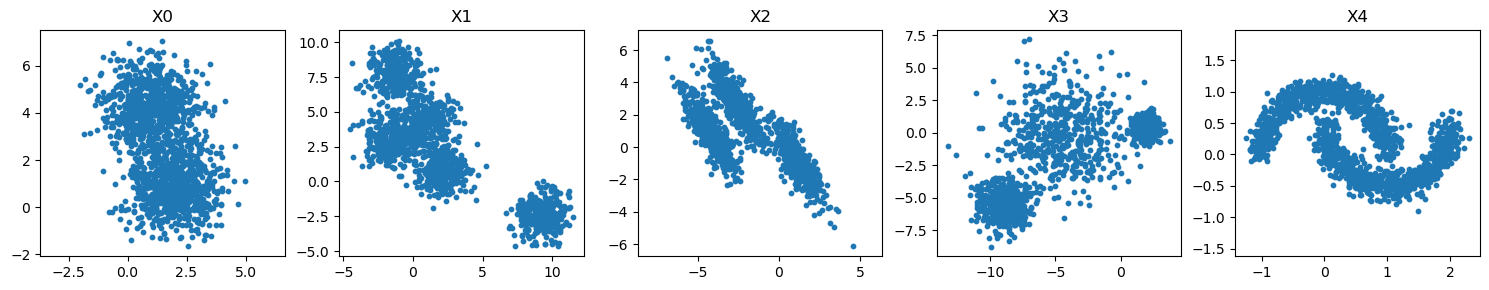

In [4]:
# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Plot each dataset in a separate subplot
for i, (dataset, title) in enumerate(zip(X, ["X0", "X1", "X2", "X3", "X4"])):
    axes[i].scatter(dataset[:, 0], dataset[:, 1], s=10)
    axes[i].set_title(title)
    axes[i].axis('equal')  # Set equal scaling for better visualization

# Adjust layout
plt.tight_layout()
plt.show()

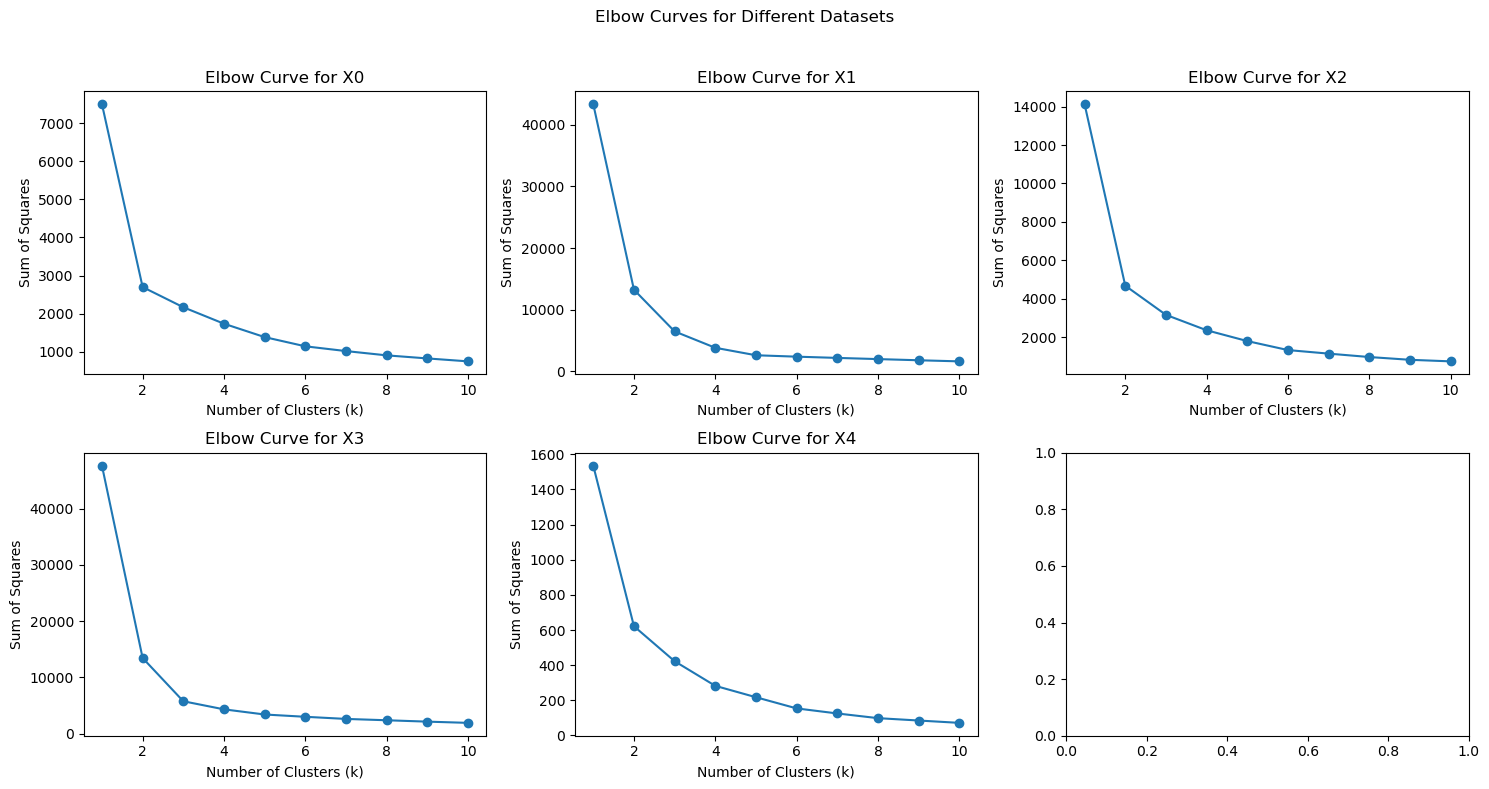

In [67]:
from sklearn.cluster import KMeans
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Elbow Curves for Different Datasets')

# Create an inertia list for each dataset
for i, dataset in enumerate(X):
    sumsqs = []
    
    # Iterate through cluster sizes and calculate inertia, appending to inertia list   
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(dataset)
        sumsqs.append(kmeans.inertia_)
        
    # Plot the elbow curve on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].plot(range(1, 11), sumsqs, marker='o')
    axes[row, col].set_title(f'Elbow Curve for X{i}')
    axes[row, col].set_xlabel('Number of Clusters (k)')
    axes[row, col].set_ylabel('Sum of Squares')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**ANSWER 2a**

The elbow is not always clear in the above plots. Here are the elbow locations per dataset with notes:

**X0**: The elbow is located at $k = 2$. Kmeans performs well because there are rounded clusters of similar variance. There appear to be two cluster centroids in the plot, but the boundaries between clusters are unclear. **My choice: k = 2**

**X1**: The elbow is located somewhere between $k = 2$ and $k = 4$. Based on intuition (looking at the plot), I will select $k = 4$ as the appropriate number of clusters for this dataset. The kmeans model does not show a distinct elbow because there are nonlinear boundaries between these clusters. However, it still performed relatively well because the clusters are round and have similar variance. **My choice: k = 4**

**X2**: The elbow is located at $k = 2$, but there are clearly three clusters of points, so I will use $k = 3$ for this dataset. The discrepancy between my choice and the "elbow" location is because the clusters are not round. Kmeans uses distance of points to the cluster center, so these elongated clusters that are near one another are frustrating the model. **My choice: k = 3**

**X3**: The elbow is located around $k = 2$ or $k = 3$. This makes sense intuitively, because the plot contains two dense clusters (similar variance) and one cluster that is not very dense and may possibly have quite a few noise points (higher variance). We know that kmeans does not perform well when clusters have different variance. I will set $k = 3$ for this plot to see how kmeans performs on the less dense structure. **My choice: k = 3**

**X4**: The elbow is located at $k = 2$, but the sum of squares is still quite high at the elbow. There appear to be two clusters, but Kmeans is probably not clustering them into the shapes that we see on the above dataset plots, due to the irregular shape of the data. **My choice: k = 2**

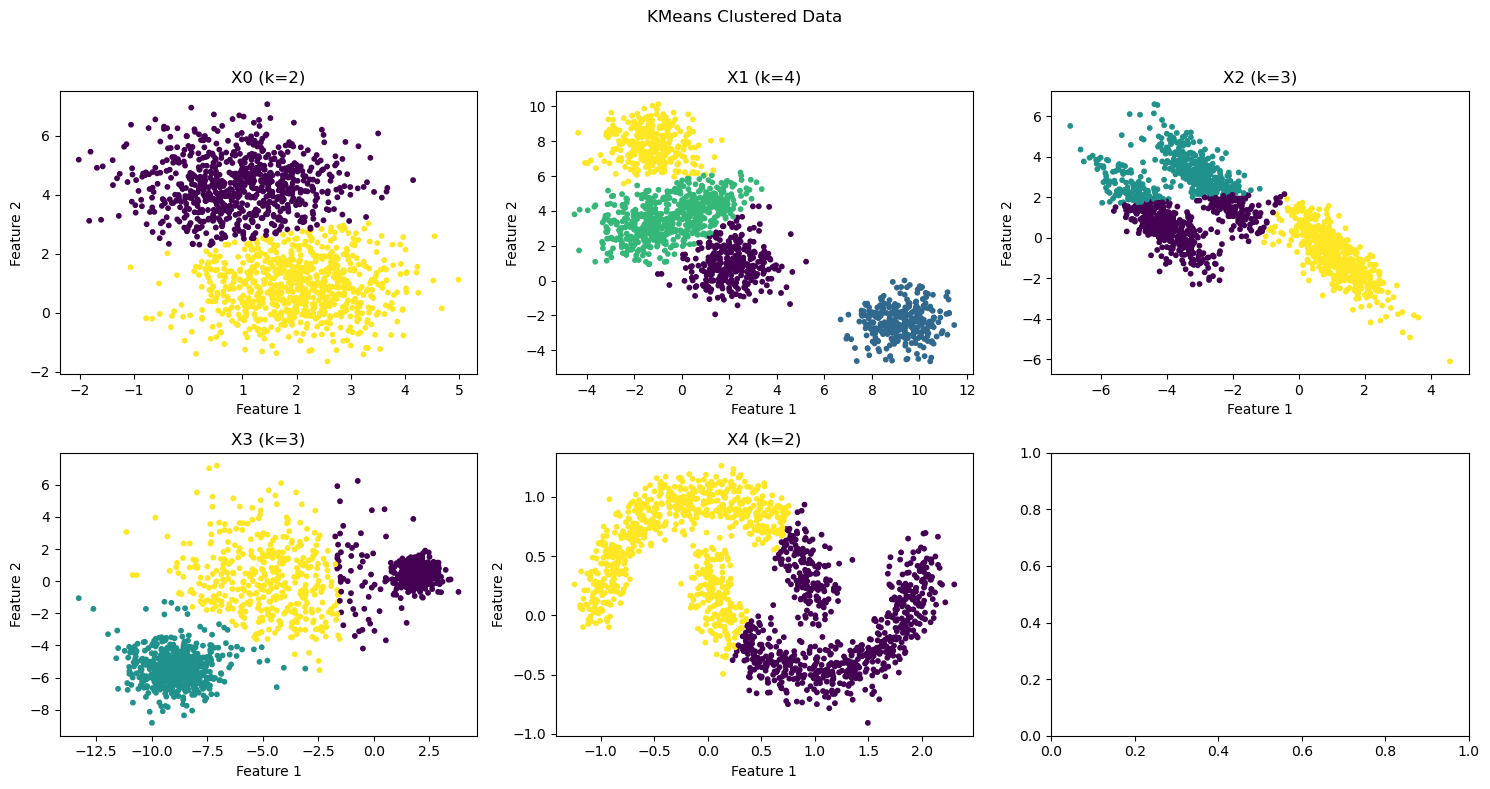

In [68]:
#### K MEANS CLUSTERING ####

# List of best k values for each dataset
best_kmeans = [2, 4, 3, 3, 2]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('KMeans Clustered Data')

# Iterate over datasets and corresponding best k values
for i, (dataset, best_k) in enumerate(zip(X, best_kmeans)):
    # Fit the specified k-means model
    kmeans = KMeans(n_clusters=best_k, random_state=0)
    cluster_assignments = kmeans.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i} (k={best_k})')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**ANSWER 2B**

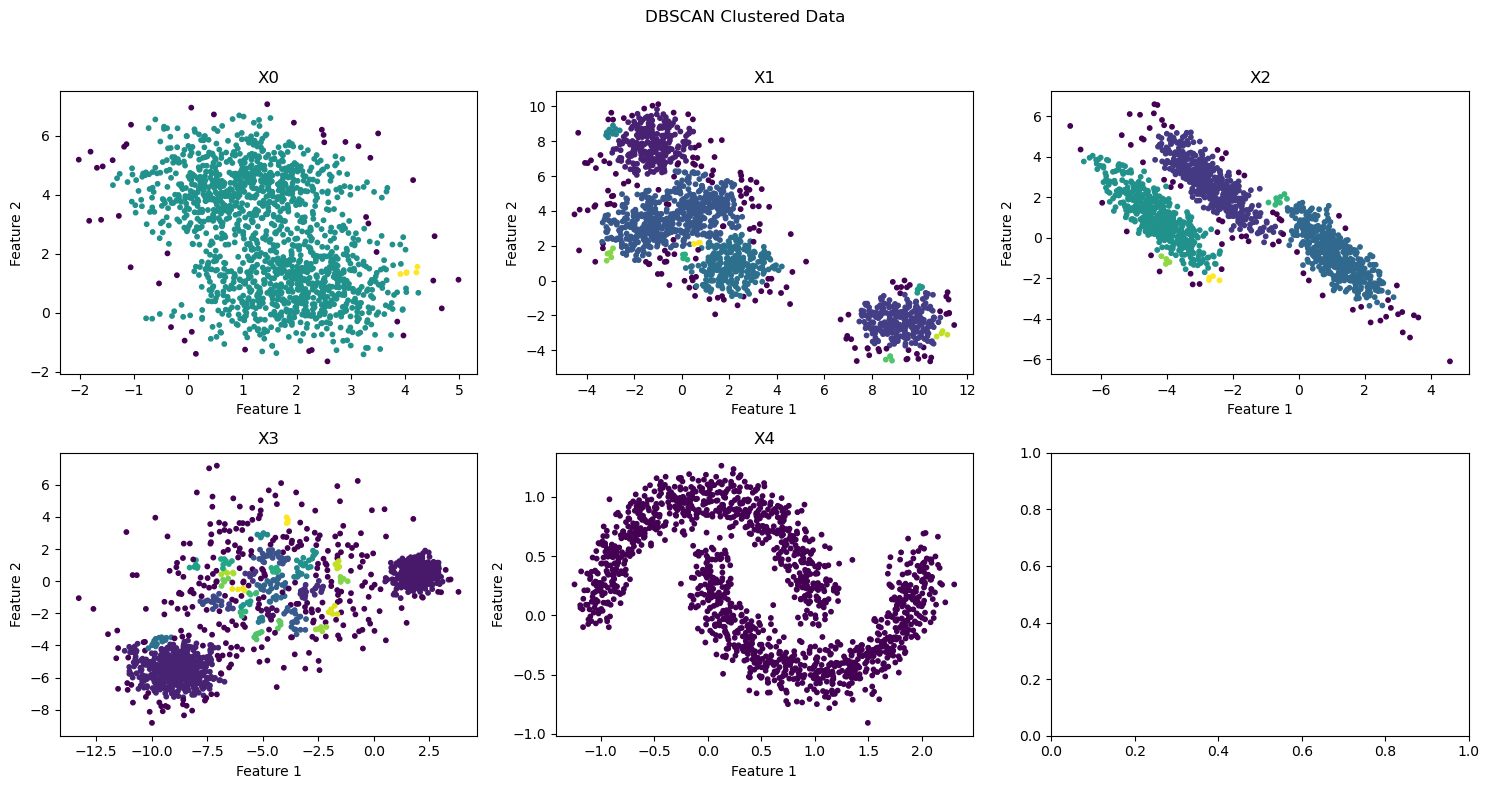

In [69]:
#### DBSCAN CLUSTERING ####

from sklearn.cluster import DBSCAN

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('DBSCAN Clustered Data')

# Iterate over datasets
for i, dataset in enumerate(X):
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.3, min_samples=4)
    cluster_assignments = dbscan.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i}')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**ANSWER 2C**

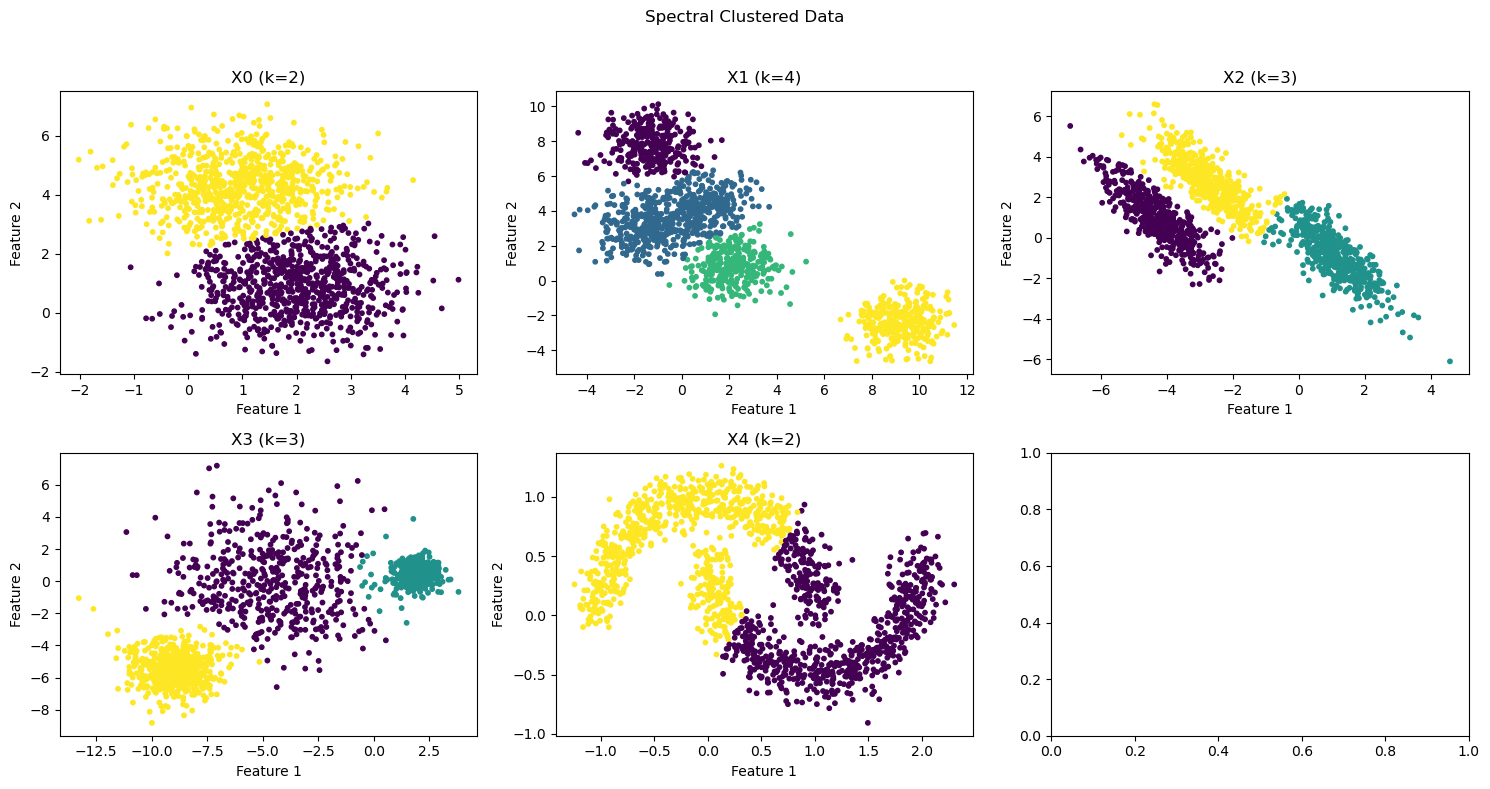

In [70]:
#### SPECTRAL CLUSTERING ####

from sklearn.cluster import SpectralClustering as spc

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Spectral Clustered Data')

# Iterate over datasets and corresponding best k values
for i, (dataset, n) in enumerate(zip(X, best_kmeans)):
    # Fit the specified spectral clustering model
    spectral = spc(n_clusters=n)
    cluster_assignments = spectral.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i} (k={n})')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**ANSWER 2D**:

After visualizing the clustering performance of kmeans, DBSCAN and spectral clustering methods, there were some clear winners in certain datasets:

KMEANS: K Means was the easiest to implement, but did not come out on top in terms of performance compared to DBSCAN or Spectral. K Means and Spectral clustering performed equally on the X0 and X1 datasets. K means and spectral also performed poorly on X4.

DBSCAN: DBSCAN required the most parameter tuning but also seemed to have the broadest applicability to different datasets. For instance, with `eps = 0.1`, DBSCAN was the only method to perfectly segment the shapes in X4. Trying to obtain similar grouping to kmeans, I landed on `eps = 0.3` and `min_samples = 4`. This parameter setting performed best on X1 and X2. The classification of noise points is a nice feature of this method, as boundaries in X1 and X2 are unclear in places. With these settings, DBSCAN did not perform well on X3 or X4, and classified X0 as one group (which might be fair).

SPECTRAL: This performed best on X2 and X3 datasets. It performed similarly to kmeans on the rest of the datasets.

# 3

## [25 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?

*Note: Remember that you typically will not have labels available in most problems.*

Code is provided for loading the data below.

In [29]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

In [38]:
# Find the dimensions of the dataset
num_samples, num_features = X_digits.shape

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 1797
Number of features: 64


**ANSWER 3A**

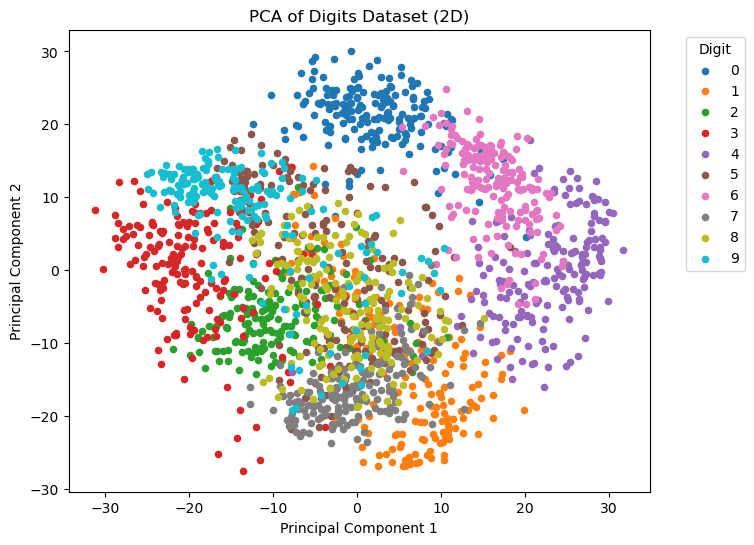

In [71]:
# Apply PCA
n_components = 2  # Number of components for PCA
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X_digits)

# Plot the data in 2D space with labels
plt.figure(figsize=(7.5, 6))

for i in range(10):
    indices = (y_digits == i)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=str(i), s=20)

plt.title('PCA of Digits Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**ANSWER 3B**

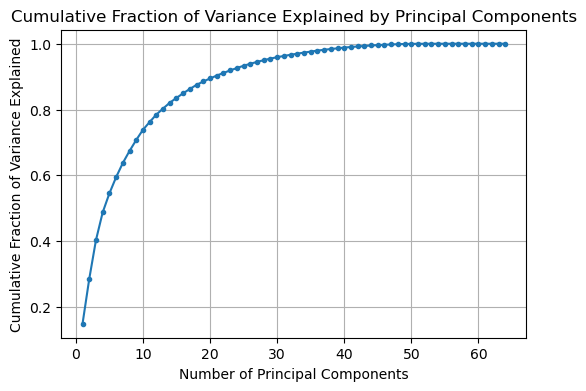

In [72]:
# Apply PCA
pca1 = PCA()
pca1.fit(X_digits)

# Calculate cumulative fraction of variance explained
cumulative_var_ratio = np.cumsum(pca1.explained_variance_ratio_)

# Plot the cumulative fraction of variance explained
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='.', linestyle='-')
plt.title('Cumulative Fraction of Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Fraction of Variance Explained')
plt.grid(True)
plt.show()

**ANSWER 3C**

71.49% of the variance in the data is not explained by the first two principal components, suggesting that the labeled clusters are not well separated in the reduced dimensional space.

In [47]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by the First 2 Principal Components:")
print(f"Principal Component 1: {fraction_variance_explained[0]:.4f}")
print(f"Principal Component 2: {fraction_variance_explained[1]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[0] + fraction_variance_explained[1])): .4f}")

Fraction of Variance Explained by the First 2 Principal Components:
Principal Component 1: 0.1489
Principal Component 2: 0.1362
Total Cumulative Variance Unexplained:  0.7149


**ANSWER 3C**

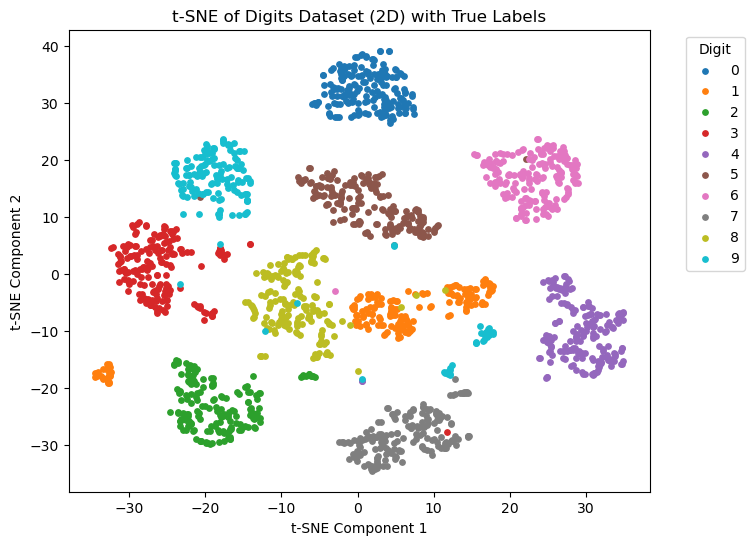

In [74]:
# Apply t-SNE
tsne = TSNE(n_components=2, 
            perplexity = 25, 
            n_iter = 500,
            random_state=0
           )
X_tsne = tsne.fit_transform(X_digits)

# Plot the data in 2D with associated labels
plt.figure(figsize=(7.5, 6))

for i in range(10):
    indices = (y_digits == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=str(i), s=15)

plt.title('t-SNE of Digits Dataset (2D) with True Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**ANSWER 3D**

The t-SNE method separated the data significantly more effectively in a highly reduced dimensional space than PCA for this problem. My interpretation is that classifying and reducing dimensionality in a dataset of handwritten digits involves preserving the relationships between pixels that form small, local features such as corners, curves, or strokes. This is a local structure problem, which t-SNE performs better on. 

I expect that PCA would perform better on problems involving satellite imagery, which is more of a problem of capturing broader patterns that exist across the entire dataset. 